# Import networks

In [2]:
import numpy as np
import os
from netrep.metrics import LinearMetric
from netrep.metrics import GaussianStochasticMetric
import matplotlib.pyplot as plt
import seaborn as sns
import json, math
from scipy import stats

# Load all networks to study here
all_networks = {
    "gating": {
        "color": "green",  # color of dots on the graph
        "names": [f"data/hdgatingCTRNN_2DIR1O_dr100_n0.1_la0_e1_dp1.0_r{i}" for i in range(30)],  # directories
        "indices": np.arange(0, 64, 16)  # indices of trials to consider (here, only using 4 trials to match neural data)
    },
    "inversion": {
        "color": "red",
        "names": [f"data/hdinversionCTRNN_2DIR1O_dr100_n0.1_la0_e1_dp1.0_r{i}" for i in range(30)],
        "indices": np.arange(0, 64, 16)
    },
    "reshuffle": {
        "color": "blue",
        "names": [f"data/hdreshuffleCTRNN_2DIR1O_dr100_n0.1_la0_sa130_e1_dp1.0_r{i}" for i in range(30)],
        "indices": np.arange(0, 64, 16)
    },
    "inv+gat": {
        "color": "purple",
        "names": [f"data/hdgating_and_inversionCTRNN_2DIR1O_dr100_n0.1_la0_e1_dp1.0_r{i}" for i in range(30)],
        "indices": np.arange(0, 64, 16)
    },
    "res+gat": {
        "color": "pink",
        "names": [f"data/hdgating_and_reshuffleCTRNN_2DIR1O_dr100_n0.1_la0_sa130_e1_dp1.0_r{i}" for i in range(30)],
        "indices": np.arange(0, 64, 16)
    },
    "ratio": {
        "color": "yellow",  # random color
        "names": [f"data/hdratioCTRNN_2DIR1O_dr100_n0.1_la0_e1_dp1.0_r{i}" for i in range(30)],
        "indices": np.arange(0, 64, 16)
    },
    "reshuffle_ad": {
        "color": "blue",
        "names": [f"data/hdreshuffle_adCTRNN_2DIR1O_dr100_n0.1_la0_sa130_e1_dp1.0_r{i}" for i in range(30)],
        "indices": np.arange(0, 64, 16)
    },
    "reshuffle_ad_blr": {
        "color": "blue",
        "names": [f"data/hdreshuffle_ad_blrCTRNN_2DIR1O_dr100_n0.1_la0_sa130_e1_dp1.0_r{i}" for i in range(30)],
        "indices": np.arange(0, 64, 16)
    },
    "backprop_nd": {
        "color": "black",
        "names": [f"data/backpropCTRNN_2DIR1O_dr100_n0.1_la0_e1_dp0.0_rAA" for i in range(1)],
        "indices": np.arange(0, 64, 16)
    },
    "backprop": {
        "color": "black",
        "names": [f"data/backpropCTRNN_2DIR1O_dr100_n0.1_la0_e1_dp1.0_r{i}" for i in range(30)],
        "indices": np.arange(0, 64, 16)
    },
    "backprop_la": {
        "color": "gray",
        "names": [f"data/backpropCTRNN_2DIR1O_dr100_n0.1_la0.0001_e1_dp1.0_r{i}" for i in range(30)],
        "indices": np.arange(0, 64, 16)
    },
    "diego_phd_mst": {
        "color": "orange",
        "names": ["neuraldata/new/diego_phd_mst_either_selective_zscored"],
        "indices": np.array([0, 1, 2, 3]),
        "neural": True
    },
    "diego_new_mst": {
        "color": "orange",
        "names": ["neuraldata/new/diego_new_mst_either_selective_zscored"],
        "indices": np.array([0, 1, 2, 3]),
        "neural": True
    }
}

n_networks = 10
net_size = 500
all_networks = {
    "backprop": {
        "color": "black",
        "names": [f"data/backpropCTRNN_2DIR1O_dr{net_size}_n0.1_la0_e1_dp1.0_r{i}" for i in range(n_networks)],
        "indices": np.arange(0, 64, 16)
    },
    "backprop_nd": {
        "color": "gray",
        "names": [f"data/backpropCTRNN_2DIR1O_dr{net_size}_n0.1_la0_e1_dp0.0_r{i}" for i in range(n_networks)],
        "indices": np.arange(0, 64, 16)
    },
    "gating": {
        "color": "green",  # color of dots on the graph
        "names": [f"data/hdgatingCTRNN_2DIR1O_dr{net_size}_n0.1_la0_e1_dp1.0_r{i}" for i in range(n_networks)],  # directories
        "indices": np.arange(0, 64, 16)  # indices of trials to consider (here, only using 4 trials to match neural data)
    },
    "deep_attractor": {
        "color": "yellow",  # random color
        "names": [f"data/hdratioCTRNN_2DIR1O_dr{net_size}_n0.1_la0_e1_dp1.0_r{i}" for i in range(n_networks)],
        "indices": np.arange(0, 64, 16)
    },
    "reshuffle": {
        "color": "blue",
        "names": [f"data/hdreshuffleCTRNN_2DIR1O_dr{net_size}_n0.1_la0_e1_dp1.0_r{i}" for i in range(n_networks)],
        "indices": np.arange(0, 64, 16)
    },
    "inversion": {
        "color": "red",
        "names": [f"data/hdinversionCTRNN_2DIR1O_dr{net_size}_n0.1_la0_e1_dp1.0_r{i}" for i in range(n_networks)],
        "indices": np.arange(0, 64, 16)
    },
    "gating+reshuffle": {
        "color": "pink",
        "names": [f"data/hdgating_and_reshuffleCTRNN_2DIR1O_dr{net_size}_n0.1_la0_sa130_e1_dp1.0_r{i}" for i in range(n_networks)],
        "indices": np.arange(0, 64, 16)
    },
    "gating+inversion": {
        "color": "purple",
        "names": [f"data/hdgating_and_inversionCTRNN_2DIR1O_dr{net_size}_n0.1_la0_e1_dp1.0_r{i}" for i in range(n_networks)],
        "indices": np.arange(0, 64, 16)
    },
    "mendoza_halliday_et_al_2014": {
        "color": "orange",
        "names": ["neuraldata/new/diego_phd_mst_either_selective_zscored"],
        "indices": np.array([0, 1, 2, 3]),
        "neural": True
    },
    "mendoza_halliday_et_al_2023": {
        "color": "orange",
        "names": ["neuraldata/new/diego_new_mst_either_selective_zscored"],
        "indices": np.array([0, 1, 2, 3]),
        "neural": True
    }
}

#keep = "gating,inversion,reshuffle120,inv+gat,backpropnd0,backproprd0,backproprde-4,backpropndWCe-3,backpropnp,notricks,diego_phd_mst,diego_phd_pfc,diego_new_mst,diego_new_pfc,cheng_pfc".split(',')
#keep = "gating,inversion,reshuffle120,inv+gat,backpropnd0,backproprd0,backproprde-4,backpropndWCe-3,backpropnp,backpropnpsde-4,notricks,diego_phd_mst,diego_phd_pfc,diego_new_mst,diego_new_pfc,cheng_pfc".split(',')
#for key in list(all_networks.keys()):
#   if key not in keep: del all_networks[key]
       
# neural data not available
#del all_networks["backprop_sd"], all_networks["backprop_pt"], all_networks["backprop"]

# load information about every network
for network in list(all_networks.values()):
    if "neural" in network: continue
    network["errors"] = []
    network["metadatas"] = []
    indices_to_remove = []
    for i, name in enumerate(network["names"]):
        if not os.path.isfile(name+"/info.json"):
            print("FILE DOES NOT EXIST:", name)
            indices_to_remove.append(i)
            continue
        with open(name+"/info.json") as f: info = json.load(f)
        network["errors"].append((info["error_distractor"][2], info["error_nodistractor"][2]))
        network["metadatas"].append(info)
    for x in indices_to_remove[::-1]:
        del network['names'][x]
    

# filter to only use the networks where MSE < 15 deg (only those that converged)
for name, network in all_networks.items():
    if 'errors' in network:
        indices_to_remove = []
        for i, error in enumerate(network['errors']):
            if (name == "backprop_nd" and (error[1]>15 or math.isnan(error[1]))) or ((error[0]>15 or math.isnan(error[0])) and name !="backprop_nd"):
                indices_to_remove.append(i)
                
        print(f"for {name}, keeping {int((1-len(indices_to_remove)/len(network['names']))*100)}% of networks")
        #indices_to_remove = []
        for x in indices_to_remove[::-1]:
            del network['names'][x]
            del network['errors'][x]
            del network['metadatas'][x]

# show all errors through time, for an overview
row_count = 0  # Counter to track the number of plots in the current row
fig, axs = plt.subplots(1, 5, figsize=(20, 4))  # Create a row of 5 subplots
for network_name, network in all_networks.items():
    if "neural" in network: continue
    ax = axs[row_count]  # Select the subplot
    for name in network["names"]:
        with open(name+"/info.json") as f: 
            info = json.load(f)
        ax.plot(list(info["error_store_saved"].keys()), list(info["error_store_saved"].values()))
    ax.set_title(network_name)
    ax.set_xlabel("training step")
    ax.set_ylabel("MSE error")
    for label in ax.get_xticklabels(): label.set_rotation(90)
    row_count += 1
    if row_count >= 5:  # Reset if 5 plots in a row
        plt.tight_layout()
        plt.show()
        fig, axs = plt.subplots(1, 5, figsize=(20, 4))
        row_count = 0
plt.tight_layout()
plt.show()

# show all final errors of kept networks, for comparison
use_networks = [key for key in all_networks.keys() if "neural" not in all_networks[key] or not all_networks[key]["neural"]]
means = [np.mean(np.array(all_networks[network]["errors"])[:, 0]) for network in use_networks]
errors = [np.std(np.array(all_networks[network]["errors"])[:, 0]) for network in use_networks]
fig = plt.figure(figsize=(10, 7))
plt.rc('font', **{'family': 'DejaVu Sans', 'weight': 'normal', 'size': 17})
ax = plt.subplot(1, 1, 1)
ax.bar(np.arange(1, len(use_networks)+1)*1.5, means, yerr=errors, align='center', alpha=1, ecolor='black', capsize=10, color="green")
plt.xticks(ticks=np.arange(1, len(use_networks)+1)*1.5, labels=use_networks)
plt.ylim(0, 30)
ax.set_ylabel('average error (deg)')
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.gca().set_xticklabels(ax.get_xticklabels(), rotation=90)
plt.tight_layout()
plt.show()

FILE DOES NOT EXIST: data/hdreshuffleCTRNN_2DIR1O_dr500_n0.1_la0_e1_dp1.0_r0
FILE DOES NOT EXIST: data/hdreshuffleCTRNN_2DIR1O_dr500_n0.1_la0_e1_dp1.0_r1
FILE DOES NOT EXIST: data/hdreshuffleCTRNN_2DIR1O_dr500_n0.1_la0_e1_dp1.0_r2
FILE DOES NOT EXIST: data/hdreshuffleCTRNN_2DIR1O_dr500_n0.1_la0_e1_dp1.0_r3
FILE DOES NOT EXIST: data/hdreshuffleCTRNN_2DIR1O_dr500_n0.1_la0_e1_dp1.0_r4
FILE DOES NOT EXIST: data/hdreshuffleCTRNN_2DIR1O_dr500_n0.1_la0_e1_dp1.0_r5
FILE DOES NOT EXIST: data/hdreshuffleCTRNN_2DIR1O_dr500_n0.1_la0_e1_dp1.0_r6
FILE DOES NOT EXIST: data/hdreshuffleCTRNN_2DIR1O_dr500_n0.1_la0_e1_dp1.0_r7
FILE DOES NOT EXIST: data/hdreshuffleCTRNN_2DIR1O_dr500_n0.1_la0_e1_dp1.0_r8
FILE DOES NOT EXIST: data/hdreshuffleCTRNN_2DIR1O_dr500_n0.1_la0_e1_dp1.0_r9
for backprop, keeping 0% of networks
for backprop_nd, keeping 90% of networks
for gating, keeping 100% of networks
for deep_attractor, keeping 100% of networks


ZeroDivisionError: division by zero

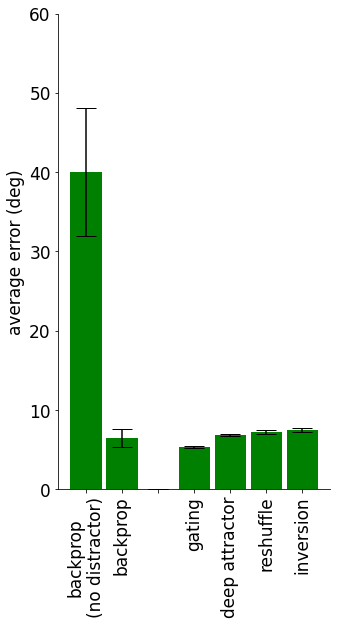

In [249]:
# show all final errors of kept networks, for comparison
use_networks = ['backprop_nd', 'backprop', None, 'gating', 'deep_attractor', 'reshuffle', 'inversion']
use_networks_names = ['backprop\n(no distractor)', 'backprop', None, 'gating', 'deep attractor', 'reshuffle', 'inversion']
#use_networks = ['backprop', None, 'gating', 'ratio', 'reshuffle_ad', 'inversion']
means = [np.mean(np.array(all_networks[network]["errors"])[:, 0]) if network is not None else 0 for network in use_networks]
errors = [np.std(np.array(all_networks[network]["errors"])[:, 0]) if network is not None else 0 for network in use_networks]
fig = plt.figure(figsize=(5, 9))
plt.rc('font', **{'family': 'DejaVu Sans', 'weight': 'normal', 'size': 17})
ax = plt.subplot(1, 1, 1)
ax.bar(np.arange(1, len(use_networks)+1)*1.5, means, yerr=errors, align='center', width=1.3,alpha=1, ecolor='black', capsize=10, color="green")
plt.xticks(ticks=np.arange(1, len(use_networks)+1)*1.5, labels=use_networks)
plt.xticks(ticks=np.arange(1, len(use_networks)+1)*1.5, labels=use_networks_names)
plt.ylim(0, 60)
ax.set_ylabel('average error (deg)')
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.gca().set_xticklabels(ax.get_xticklabels(), rotation=90)
plt.tight_layout()
plt.show()

# Load and normalize firing rates

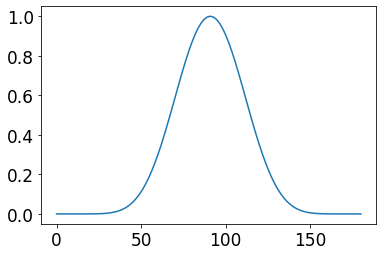

In [189]:
import torch
def _o_spikes(pref, stim, exponent, max_spike, k):
    # o_spikes: spike numbers per trial for direction tuning cells
    # r = o_spikes(pref, stim, exponent, k)
    # pref: row vec for cells' preferred directions
    # stim: column vec for stimulus directions
    # exponent: scalar determining the widths of tuning. larger value for sharper tuning
    # maxSpike: scalar for mean max spike number when pref = stim
    # k: scalar for determining variance = k * mean
    # spikes: different columuns for cells with different pref orintations
    #         different rows for different stim directions
    np_ = pref.shape[0]  # number of elements in pref
    ns = stim.shape[0]  # number of elements in stim
    prefs = torch.ones((ns, 1)) @ pref[None, :]  # ns x np array, (ns x 1) @ (1 x np)
    stims = stim[:, None] @ torch.ones((1, np_))  # ns x np array, (ns x 1) @ (1 x np)
    # mean spike numbers
    mean_spike = max_spike * (0.5 * (torch.cos( (prefs - stims)) + 1)) ** exponent  # ns x np array
    # sigma for noise
    sigma_spike = torch.sqrt(k * mean_spike)
    # spikes = normrnd(meanSpike, sigmaSpike)# ns x np array, matlab
    spikes = torch.normal(mean_spike, sigma_spike)  # ns x np array, python
    # no negative spike numbers
    spikes[spikes < 0] = 0  # ns x np array
    return spikes

# convert input direction angle (in deg) to firing rates of direction-selective input units
def _input_direction_representation(direction):
    pref = 2*math.pi * torch.arange(net_size) / net_size
    stim = torch.tensor([(direction / 180 * math.pi)], dtype=torch.float32)
    exponent = 4; max_spike = 1; k = 0
    rates = _o_spikes(pref, stim, exponent, max_spike, k)[0]
    return rates

plt.plot(np.linspace(0, 180, net_size),_input_direction_representation(180))

In [1]:
add_sensory_units = False
def normalization_function(firing_rates, smoothing_term=0.05):
    mean_fr = np.expand_dims(np.mean(firing_rates, axis=0), axis=0)
    std_fr = np.expand_dims(np.std(firing_rates, axis=0), axis=0)
    return (firing_rates - mean_fr)/(std_fr+smoothing_term)+1
    
    min_fr = np.expand_dims(np.min(firing_rates, axis=0), axis=0)
    max_fr = np.expand_dims(np.max(firing_rates, axis=0), axis=0)
    return (firing_rates-min_fr) / (max_fr-min_fr+smoothing_term)    
    
arrays = []
network_names = []
i = 0
for network_name, network in all_networks.items():
    names = network["names"]
    if "neural" in network:  # process neural data separately, as it's in a different format.
        for name in names:
            temp = np.load(name+".npy").reshape(4, 2, -1)+1
            #temp = normalization_function(temp, smoothing_term=1)
            temp = temp.reshape(-1, temp.shape[-1])
            arrays.append(temp)
            print(temp.shape)
    else:
        for j, name in enumerate(names):
            # defining parameters (these have to be the same as in training files)
            n_trials = 64
            net_size = 100

            model_parameterupdate = network['metadatas'][j]['hyperparameters']['train_for_steps']
            task_param = network['metadatas'][j]['task_parameters']
            delay0 = (task_param['delay0_from']+task_param['delay0_to'])//2
            delay1 = task_param['delay1_to']
            delay2 = (task_param['delay2_from']+task_param['delay2_to'])//2
            input_time = task_param['show_direction_for']
            show_cue_for = task_param['show_cue_for']
            
            total_time = delay0+delay2+input_time+show_cue_for
            t_cue_from = delay0
            t_cue_to = delay0+input_time
            t_d_from = delay0+input_time+20  # remove first 200 ms of delay
            t_d_to = delay0+input_time+delay1

            if '_ad' in name: model_parameterupdate = 2000
            array = np.load(name+f"/model_parameterupdate{model_parameterupdate}_fr.npy")
            temp = np.zeros((n_trials, 2, net_size))
            temp[:, 0, :] = np.mean(array.reshape(n_trials, total_time, net_size)[::, t_cue_from:t_cue_to, :], axis=1)
            temp[:, 1, :] = np.mean(array.reshape(n_trials, total_time, net_size)[::, t_d_from:t_d_to, :], axis=1)

            if add_sensory_units:
                temp2 = np.zeros((n_trials, 2, net_size*2))
                temp2[:, :, :net_size] = np.copy(temp)
                for k in range(64):
                    temp2[k, 0, net_size:] = _input_direction_representation((k//8)*45)
                temp = temp2
            
            temp = normalization_function(temp, smoothing_term=0.01)
            temp = temp[network["indices"]]  # only select certain trials
            temp = temp.reshape(-1, temp.shape[-1])
            arrays.append(temp)
            
    network_names.append(network_name)
    network['ids'] = []
    for name in names:
        network['ids'].append(i)
        i+=1

NameError: name 'all_networks' is not defined

## Visualize firing rates of neurons after normalization

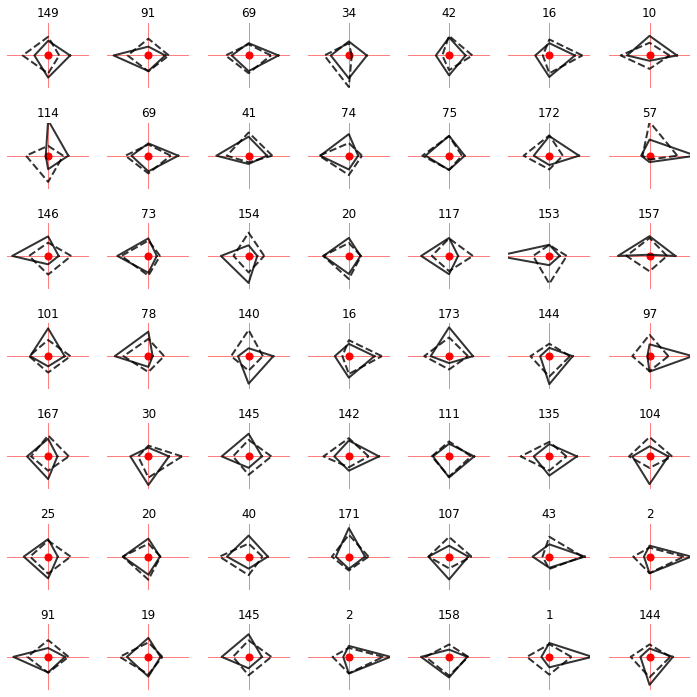

In [714]:
# visualize how selective neurons look like after normalization
# solid line for t=input, dotted for t=distractor
show_neurons = "diego_phd_mst"
#show_neurons = "gating"
array = np.copy(arrays[all_networks[show_neurons]["ids"][0]].reshape(4, 2, -1))
fig, axes = plt.subplots(7, 7, figsize=(10, 10))
for i in range(7):
    for j in range(7):
        ax = axes[i, j]
        n_i = 5 * i + j
        n_i = np.random.randint(0, array.shape[-1]-1)#5 * i + j
        
        ax.scatter([0], [0], 50, color="red")
        ax.plot([-100, 100], [0, 0], "r-", linewidth=.5)
        ax.plot([0, 0], [-100, 100], "r-", linewidth=.5)

        coords = np.array([[1, 0], [0, 1], [-1, 0], [0, -1], [1, 0]], dtype=float)
        coords *= np.expand_dims(array[:, 0, n_i][[0, 1, 2, 3, 0]], axis=1)
        ax.plot(coords[:, 0], coords[:, 1], "k-", linewidth=2, alpha=0.8)

        coords = np.array([[1, 0], [0, 1], [-1, 0], [0, -1], [1, 0]], dtype=float)
        coords *= np.expand_dims(array[:, 1, n_i][[0, 1, 2, 3, 0]], axis=1)
        ax.plot(coords[:, 0], coords[:, 1], "k--", linewidth=2, alpha=0.8)

        ax.set_title(n_i, fontsize=12)

        lim = 2
        ax.set_xlim(-lim, lim)
        ax.set_ylim(-lim, lim)
        ax.axis('off')
plt.tight_layout()
plt.show()

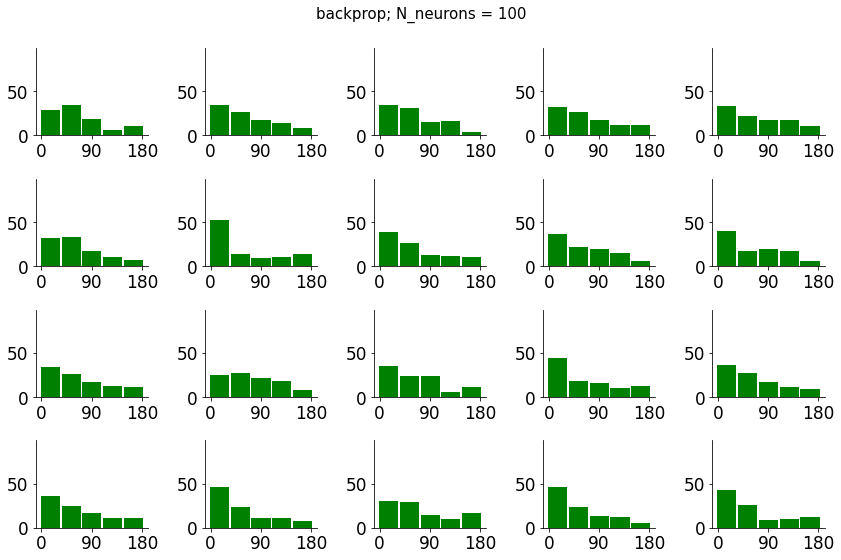

In [262]:
show_neurons = "backprop"
#show_neurons = "backprop_lt_pt"

fig = plt.figure(figsize=(12,8))
plt.rc('font', **{'family': 'DejaVu Sans', 'weight': 'normal', 'size': 17})
ylim = 99
bins = 5

for i in range(5):
    for j in range(4):
        ind = (5*j+i) % len(all_networks[show_neurons]["ids"])
        array = np.copy(arrays[all_networks[show_neurons]["ids"][ind]].reshape(4, 2, -1))

        thetas = np.array([0, 90, 180, 270]) / 180 * np.pi
        thetas = np.expand_dims(thetas, 1)
        thetas = np.expand_dims(thetas, 1)
        cn = np.sum(np.exp(1j*thetas)*array, axis=0)/np.sum(array, axis=0)
        pref = np.angle(cn)
        
        pref_angle_diff = np.copy(pref[0]-pref[1]) / np.pi * 180
        pref_angle_diff = np.abs(pref_angle_diff)
        pref_angle_diff[pref_angle_diff>180] = 360 - pref_angle_diff[pref_angle_diff>180]
        pref_angle_diff = pref_angle_diff[:]

        
        ax = fig.add_subplot(4, 5, 5*j+i+1)
        
        # Replacing torch.histc with numpy.histogram
        hist, edges = np.histogram(pref_angle_diff, bins=bins, range=(0, 180))
        hist = hist.astype(float) / np.sum(hist)
        
        x = np.linspace(0, 180, bins, endpoint=False)  # Generate bin centers
        if bins==5: x = x*1.033+16  # make the bars align
        if bins==7: x = x*1.033+10
        ax.bar(x, hist*100, align='center', width=180/bins/1.05, color="green")
        
        #ax.set_title(f"{ind}")
        #ax.set_xlabel('preference change (deg)', fontsize=16)
        #ax.set_ylabel('% of neurons', fontsize=16)
        ax.set_xticks(np.arange(0, 181, 90))
        ax.set_ylim(0, ylim)
        ax.spines['top'].set_visible(False)
        ax.spines['right'].set_visible(False)

plt.suptitle(f"{show_neurons}; N_neurons = {len(pref_angle_diff)}", fontsize=15)
plt.tight_layout()
plt.show()

# Calculate distance matrix and run tSNE

Parallelizing 25878 distance calculations with 12 processes.


Computing distances: 100%|███████████████| 25878/25878 [00:51<00:00, 500.59it/s]


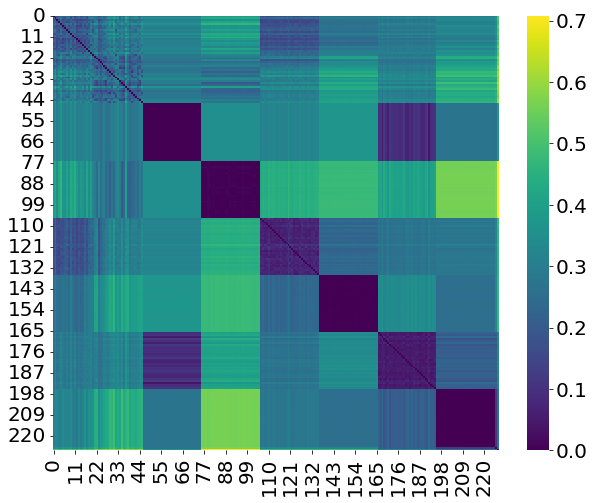

/var/folders/47/5g669ycs2t17c0kkg2_np43m0000gn/T/ipykernel_65196/35068407.py:22: RuntimeWarning: Mean of empty slice
  dist_ave[i, j] = np.nanmean(temp)


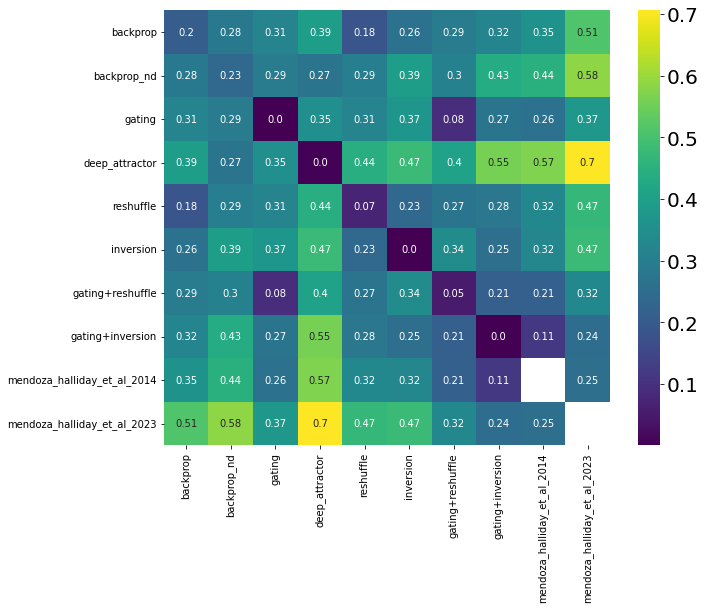

In [254]:
# calculating distances between networks
metric = LinearMetric(alpha=1.0, zero_pad=True)
dist = metric.pairwise_distances(arrays)[0]

labels_once = list(all_networks.keys())
plt.rc('font', **{'family': 'DejaVu Sans', 'weight': 'normal', 'size': 20})
fig = plt.figure(figsize=(10, 8))
ax = sns.heatmap(dist, cmap="viridis")
plt.show()

fig = plt.figure(figsize=(10, 8))
n_networks = len(labels_once)
dist_ave = np.zeros((n_networks, n_networks))
for i in range(n_networks):
    for j in range(n_networks):
        temp = np.copy(dist[list(all_networks.values())[i]['ids'], :][:, list(all_networks.values())[j]['ids']])
        if i==j: 
            for k in range(len(temp)):
                temp[k, k] = None # remove diagonal elemenrs
        #print(i, j, temp)
        #print(list(networks.values())[i]['ids'], list(networks.values())[j]['ids'])
        dist_ave[i, j] = np.nanmean(temp)
ax = sns.heatmap(dist_ave, cmap="viridis", annot=((dist_ave*100).astype(int)/100).astype(str), annot_kws={'fontsize': 10}, fmt='s')
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
ax.set_yticklabels(ax.get_yticklabels(), rotation=0)
plt.xticks(np.linspace(0.5, len(labels_once)-.5, len(labels_once)), labels_once, fontsize=10)
plt.yticks(np.linspace(0.5, len(labels_once)-.5, len(labels_once)), labels_once, fontsize=10)
plt.show()

/var/folders/47/5g669ycs2t17c0kkg2_np43m0000gn/T/ipykernel_65196/3929263155.py:15: RuntimeWarning: invalid value encountered in double_scalars
  dist_sem[i, j] = np.nanstd(temp) / (np.count_nonzero(~np.isnan(temp))-1)**0.5


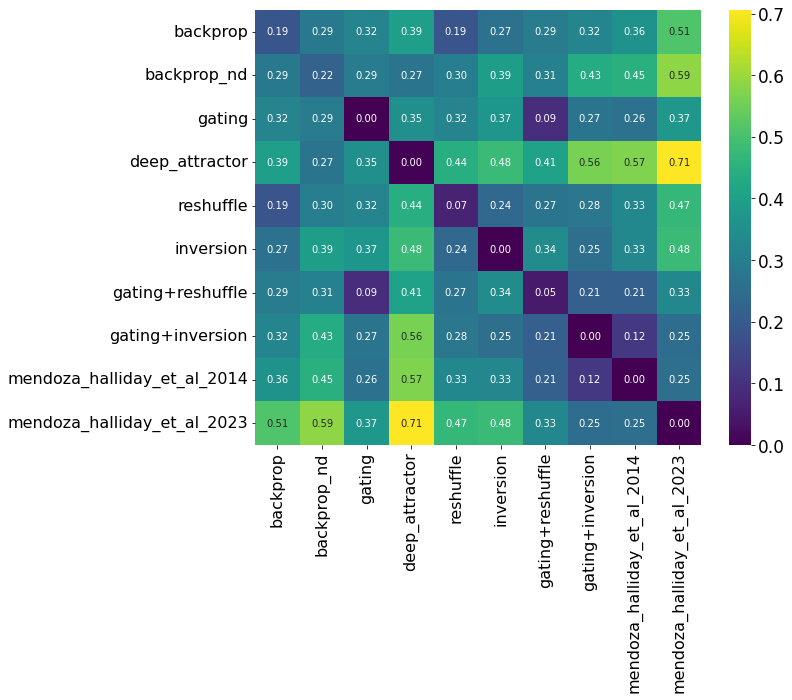

In [286]:
fig = plt.figure(figsize=(10, 8))
n_networks = len(labels_once)
dist_ave = np.zeros((n_networks, n_networks))
dist_sem = np.zeros((n_networks, n_networks))
for i in range(n_networks):
    for j in range(n_networks):
        temp = np.copy(dist[list(all_networks.values())[i]['ids'], :][:, list(all_networks.values())[j]['ids']])
        if i==j: 
            for k in range(len(temp)):
                for kk in range(k):
                    temp[kk, k] = None # remove diagonal elemenrs
        #print(i, j, temp)
        #print(list(networks.values())[i]['ids'], list(networks.values())[j]['ids'])
        dist_ave[i, j] = np.nanmean(temp)
        dist_sem[i, j] = np.nanstd(temp) / (np.count_nonzero(~np.isnan(temp))-1)**0.5
dist_annot = []
for i in range(n_networks):
    dist_annot.append([])
    for j in range(n_networks):
        #dist_annot[-1].append(f"{dist_ave[i, j]:.2f}\n+-{dist_sem[i, j]:.2f}")
        dist_annot[-1].append(f"{dist_ave[i, j]:.2f}")
        
ax = sns.heatmap(dist_ave, cmap="viridis", annot=dist_annot, annot_kws={'fontsize': 10}, fmt='s')
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
ax.set_yticklabels(ax.get_yticklabels(), rotation=0)
plt.xticks(np.linspace(0.5, len(labels_once)-.5, len(labels_once)), labels_once, fontsize=16)
plt.yticks(np.linspace(0.5, len(labels_once)-.5, len(labels_once)), labels_once, fontsize=16)
plt.show()

In [ ]:
all_networks[]

Perplexity value 500 is too high. Using perplexity 75.67 instead


['backprop', 'backprop_nd', 'gating', 'deep_attractor', 'reshuffle', 'inversion', 'gating+reshuffle', 'gating+inversion', 'mendoza_halliday_et_al_2014', 'mendoza_halliday_et_al_2023']


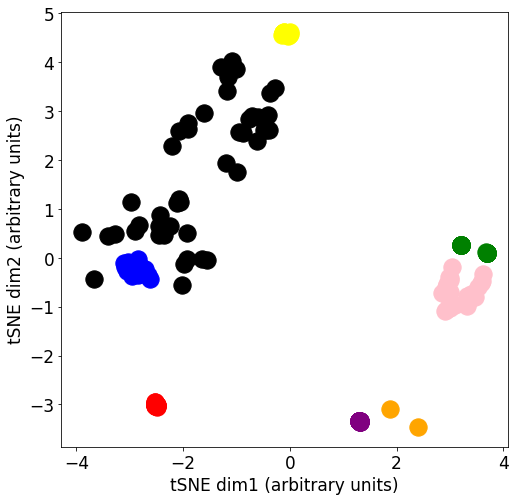

In [266]:
import openTSNE
tsne = openTSNE.TSNE(
    perplexity=500,  # always use maximum possible perplexity, to preserve global structure
    metric='precomputed',
    verbose=False,
    initialization='spectral',
)

max_networks = 30
include = "gating,inversion,reshuffle,notricks,backprop_la0".split(',')
include = list(all_networks.keys())
print(include)
exclude = [x for x in include if ("backprop" in x and x!="backpropdd")]#["backprop", "backprop_pt_la"]#["inv+gat"]
#exclude += "diego_phd_mst,diego_new_mst".split(',')
exclude=['reshuffle', 'backprop']
exclude = ['reshuffle', 'reshuffle_ad_blr', 'backprop_la']
exclude = ['']
include = [x for x in include if x not in exclude]
ids = np.concatenate([(all_networks[name]['ids'])[:max_networks] for name in include])
embedding = tsne.fit(dist[ids, :][:, ids])
fig = plt.figure(figsize=(8, 8))
plt.rc('font', **{'family': 'DejaVu Sans', 'weight': 'normal', 'size': 17})
i = 0
for name, network in all_networks.items():
    if name not in include: continue
    n = min(len(network['ids']), max_networks)
    plt.scatter(embedding[i:i+n, 0], embedding[i:i+n, 1], 300, marker='o',color=network['color'], label=name)
    i += n
plt.xlabel("tSNE dim1 (arbitrary units)")
plt.ylabel("tSNE dim2 (arbitrary units)")
#plt.xticks([])
#plt.yticks([])
#plt.xlim(-8, 8)
#plt.ylim(-6, 3)
#plt.legend()
#plt.gca().axis('off')
plt.savefig("tSNE.pdf", bbox_inches = 'tight')

## Try to embed new points into an existing space (not working yet)

In [170]:
include_new = "diego_phd_mst,diego_phd_pfc,diego_new_mst,diego_new_pfc,cheng_pfc".split(',')
include_new = exclude#"diego_phd_mst,diego_new_mst".split(',')
max_networks = 30
ids_new = np.concatenate([all_networks[name]['ids'][:max_networks] for name in include_new])
embedding_new = embedding.transform(dist[ids[:], :][:, ids_new].T, perplexity=500, exaggeration=1)
fig = plt.figure(figsize=(10, 10))
plt.rc('font', **{'family': 'DejaVu Sans', 'weight': 'normal', 'size': 14})
i = 0
for name, network in all_networks.items():
    if name not in include: continue
    n = min(len(network['ids']), max_networks)
    plt.scatter(embedding[i:i+n, 0], embedding[i:i+n, 1], 400, color=network['color'], label=name)
    i += n
i = 0
for name, network in all_networks.items():
    if name not in include_new: continue
    n = min(len(network['ids']), max_networks)
    plt.scatter(embedding_new[i:i+n, 0], embedding_new[i:i+n, 1], 400, color=network['color'], label=name, alpha=0.8)
    i += n
plt.xlabel("openTSNE dim1")
plt.ylabel("openTSNE dim2")
#plt.legend()
plt.gca().axis('off')
plt.show()#plt.savefig("ccn_opentsne.pdf", bbox_inches = 'tight')

ValueError: need at least one array to concatenate

# Display firing rates

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/umap/umap_.py:1780: UserWarning: using precomputed metric; inverse_transform will be unavailable
  warn("using precomputed metric; inverse_transform will be unavailable")
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/umap/umap_.py:2344: UserWarning: n_neighbors is larger than the dataset size; truncating to X.shape[0] - 1
  warn(


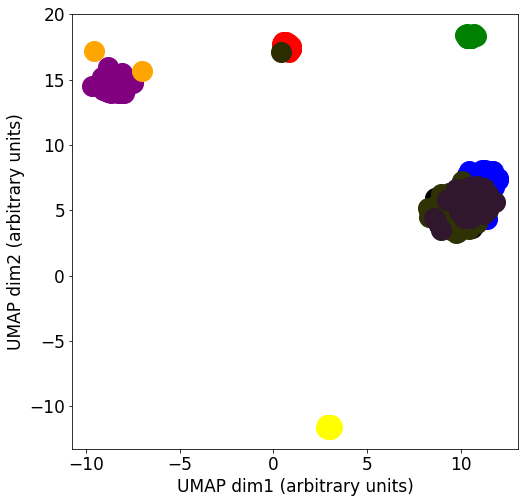

In [688]:
import umap
embedding = umap.UMAP(metric='precomputed', n_neighbors=3000, densmap=True).fit_transform(dist[ids, :][:, ids])

fig = plt.figure(figsize=(8, 8))
plt.rc('font', **{'family': 'DejaVu Sans', 'weight': 'normal', 'size': 17})
i = 0
for name, network in all_networks.items():
    if name not in include: continue
    n = min(len(network['ids']), max_networks)
    plt.scatter(embedding[i:i+n, 0], embedding[i:i+n, 1], 400, color=network['color'], label=name)
    i += n
plt.xlabel("UMAP dim1 (arbitrary units)")
plt.ylabel("UMAP dim2 (arbitrary units)")
#plt.xticks([])
#plt.yticks([])
#plt.xlim(-8, 8)
#plt.ylim(-6, 3)
#plt.legend()
#plt.gca().axis('off')
plt.savefig("tSNE.pdf", bbox_inches = 'tight')

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


IndexError: index 236 is out of bounds for axis 0 with size 236

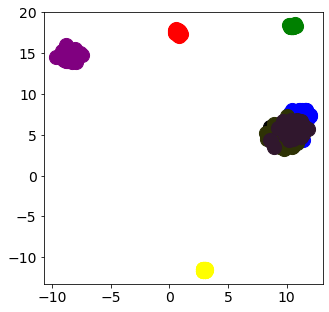

In [689]:
fig = plt.figure(figsize=(5, 5))
plt.rc('font', **{'family': 'DejaVu Sans', 'weight': 'normal', 'size': 14})
for i in range(n_networks):
    plt.scatter(embedding[list(all_networks.values())[i]['ids'][:max_networks], 0], embedding[list(all_networks.values())[i]['ids'][:max_networks], 1], 200, list(all_networks.values())[i]['color'], label=network_names[i])
plt.xlabel("UMAP dim1")
plt.ylabel("UMAP dim2")
#plt.legend()
plt.show()

data/hdgatingCTRNN_2DIR1O_dr100_n0.1_la0_r5_dv


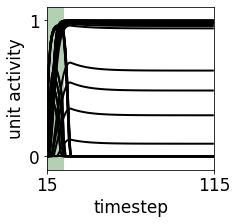

In [36]:
import matplotlib.patches as mpatches

network = all_networks["inversion"]
network = all_networks["gating"]
j = 5
n_trials = 64
net_size = 100

name = network['names'][j]
print(name)
t_from, t_to = delay0, delay0+input_time+delay1
array = np.load(name+f"/model_parameterupdate{network['metadatas'][j]['hyperparameters']['train_for_steps']}_fr.npy")
array = array.reshape(n_trials, 265, net_size)
fig = plt.figure(figsize=(3, 3))
plt.rc('font', **{'family': 'DejaVu Sans', 'weight': 'normal', 'size': 17})
for i in range(0, net_size, 6):
    plt.plot(array[0::16, 0:t_to, i].T, linewidth=2, color="k", alpha=1)
plt.gca().axvspan(t_from, t_from+input_time, facecolor="darkgreen", alpha=0.3)
plt.xlim(t_from, t_to)
plt.xticks((t_from, t_to))
plt.ylim(-0.1, 1.1)
plt.yticks([0,1])
plt.xlabel("timestep")
plt.ylabel("unit activity")
plt.savefig(f"firingrates{j}.pdf", bbox_inches = 'tight')

# Statistical tests between clusters

In [489]:
neuraldata_name = "diego_phd_mst"
comparison_cluster1 = "backprop"
comparison_cluster2 = "backpropnd0"

dist_1 = dist[all_networks[neuraldata_name]['ids'], :][:, all_networks[comparison_cluster1]['ids']][0]
dist_2 = dist[all_networks[neuraldata_name]['ids'], :][:, all_networks[comparison_cluster2]['ids']][0]

t_stat, p_value = stats.ttest_ind(dist_1, dist_2, alternative='two-sided')
print(f"distances {neuraldata_name}<->{comparison_cluster1}: {np.mean(dist_1):.3f} +- {stats.sem(dist_1):.3f} (N={len(all_networks[comparison_cluster1]['ids'])})")
print(f"distances {neuraldata_name}<->{comparison_cluster2}: {np.mean(dist_2):.3f} +- {stats.sem(dist_2):.3f} (N={len(all_networks[comparison_cluster2]['ids'])})")
print(f"P = {p_value}")

KeyError: 'backproprde-4'

In [404]:
neuraldata_name = "diego_phd_mst"
comparison_sample = "inversion"
comparison_cluster = "backpropnd0"

comparison_sample_id = all_networks[comparison_sample]['ids'][0]
comparison_cluster_ids = all_networks[comparison_cluster]['ids']

dist_1 = dist[all_networks[neuraldata_name]['ids'], :][:, comparison_sample_id][0]
dist_2 = dist[all_networks[neuraldata_name]['ids'], :][:, comparison_cluster_ids][0]

t_stat, p_value = stats.ttest_1samp(dist_2, dist_1)
print(f"distances {neuraldata_name}<->{comparison_sample}: {np.mean(dist_1):.3f} +- {stats.sem(dist_1):.3f} (N=1)")
print(f"distances {neuraldata_name}<->{comparison_cluster}: {np.mean(dist_2):.3f} +- {stats.sem(dist_2):.3f} (N={len(comparison_cluster_ids)})")
print(f"P = {p_value}")

distances diego_phd_mst<->inversion: 0.219 +- nan (N=1)
distances diego_phd_mst<->backpropnd0: 0.293 +- 0.007 (N=19)
P = 6.6590436557204835e-09


/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/numpy/core/_methods.py:264: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/numpy/core/_methods.py:256: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


# Calculating noise-corrected distance

In [264]:
metric = LinearMetric(alpha=1.0, zero_pad=True)

neuraldata_name = "mendoza_halliday_et_al_2014"
comparison_networks_names = [None, "backprop", None, "gating", "deep_attractor", "reshuffle", "inversion", "gating+reshuffle", "gating+inversion", ]
comparison_networks_displaynames = ["noise floor", None, "backprop", None, "gating", "deep attractor", "reshuffle", "inversion", "reshuffle + inversion", "gating + inversion", ]

comparison_distances = []
for comparison_network in comparison_networks_names:
    if comparison_network is None: 
        comparison_distances.append(None)
        continue
        
    distances_a1a2 = []
    distances_a1b = []
    N_repeats = 100
    for i in range(N_repeats):
        array_a = arrays[all_networks[neuraldata_name]['ids'][0]]
        array_a = arrays[np.random.choice(all_networks[neuraldata_name]['ids'], replace=False)]
        array_b = arrays[np.random.choice(all_networks[comparison_network]['ids'], replace=False)]
        # Split the neural data in two groups (for noise ceiling calculation)
        n_samples = min(array_a.shape[1]//2, array_b.shape[1])
        indices_a = np.random.choice(np.arange(array_a.shape[1]), n_samples*2, replace=False)
        indices_a1 = indices_a[:n_samples]
        indices_a2 = indices_a[n_samples:]
        indices_b = np.random.choice(np.arange(array_b.shape[1]), n_samples, replace=False)
        
        X, Y = array_a[:, indices_a1], array_a[:, indices_a2]
        metric.fit(X, Y)
        dist_a1a2 = metric.score(X, Y) / np.pi * 2  # normalize the distances from [0, pi/2] to [0, 1]
        
        X, Y = array_a[:, indices_a1], array_b[:, indices_b]
        metric.fit(X, Y)
        dist_a1b = metric.score(X, Y) / np.pi * 2  # normalize the distances from [0, pi/2] to [0, 1] 
    
        distances_a1a2.append(dist_a1a2)
        distances_a1b.append(dist_a1b)
    distances_a1a2, distances_a1b = np.array(distances_a1a2), np.array(distances_a1b)
    comparison_distances.append(distances_a1b)

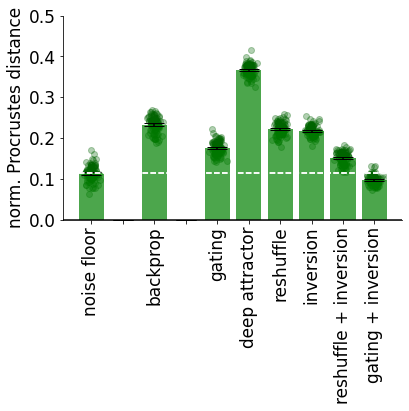

In [265]:
distances_list = [distances_a1a2] + comparison_distances
labels = ['noise floor'] + comparison_networks_names

means = []
errors = []

# Calculate means and standard deviations for each array
for distances in distances_list:
    if distances is None:
        means.append(0)
        errors.append(0)
        continue
    means.append(np.mean(distances))
    errors.append(1.96*np.std(distances)/(N_repeats-1)**0.5)

x = np.arange(len(labels))  # the label locations
width = 0.8  # the width of the bars

fig, ax = plt.subplots(figsize=(6, 6))
plt.rc('font', **{'family': 'DejaVu Sans', 'weight': 'normal', 'size': 17})

# Add data points
for i, mean in enumerate(means):
    y_values = distances_list[i]
    if y_values is None: continue
    ax.scatter(np.random.randn(len(y_values))*0.1+i, y_values, color='darkgreen', zorder=0, alpha=0.3)

# Create bars with error bars
rects1 = ax.bar(x, means, width, yerr=errors, color="green", alpha=0.7, label='Means', capsize=10)
ax.axhline(means[0], color="white", linestyle="--")
ax.axhline(means[0], color="white", linestyle="--")

# Labels and titles
ax.set_ylabel('norm. Procrustes distance')
#ax.set_title(f'distances to {neuraldata_name}')
ax.set_xticks(x)
ax.set_xticklabels(comparison_networks_displaynames, rotation=90)
ax.axhline(0, color='black')
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.ylim(0.00, 0.5)
#ax.legend()

fig.tight_layout()

# Show plot
plt.show()

In [259]:
import scipy
scipy.stats.ttest_ind(comparison_distances[1], comparison_distances[5], alternative="less")

Ttest_indResult(statistic=7.669681850611274, pvalue=0.999999999999619)

ValueError: shape mismatch: objects cannot be broadcast to a single shape.  Mismatch is between arg 0 with shape (9,) and arg 1 with shape (7,).

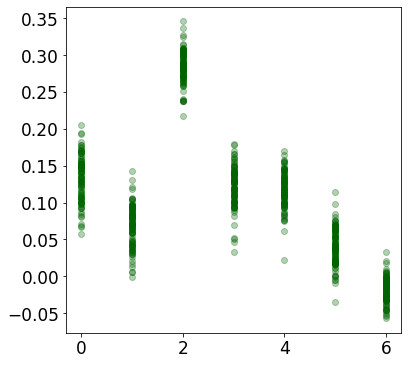

In [269]:
distances_list = [(x-distances_a1a2)/(1-distances_a1a2) for x in comparison_distances if x is not None]
labels = comparison_networks_names

means = []
errors = []

# Calculate means and standard deviations for each array
for distances in distances_list:
    means.append(np.mean(distances))
    errors.append(np.std(distances))

x = np.arange(len(labels))  # the label locations
width = 0.8  # the width of the bars

fig, ax = plt.subplots(figsize=(6, 6))
plt.rc('font', **{'family': 'DejaVu Sans', 'weight': 'normal', 'size': 17})

# Add data points
for i, mean in enumerate(means):
    y_values = distances_list[i]
    ax.scatter([i]*len(y_values), y_values, color='darkgreen', zorder=0, alpha=0.3)

# Create bars with error bars
rects1 = ax.bar(x, means, width, yerr=errors, color="green", alpha=0.7, label='Means', capsize=10)

# Labels and titles
ax.set_ylabel('norm. Procrustes distance')
ax.set_title(f'distances to {neuraldata_name}')
ax.set_xticks(x)
ax.set_xticklabels(labels, rotation=90)
ax.axhline(0, color='black')
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
#ax.legend()

fig.tight_layout()

# Show plot
plt.show()

##### Archive

/var/folders/47/5g669ycs2t17c0kkg2_np43m0000gn/T/ipykernel_41394/2719528755.py:13: RuntimeWarning: Mean of empty slice
  dist_ave[i, j] = np.nanmean(temp)


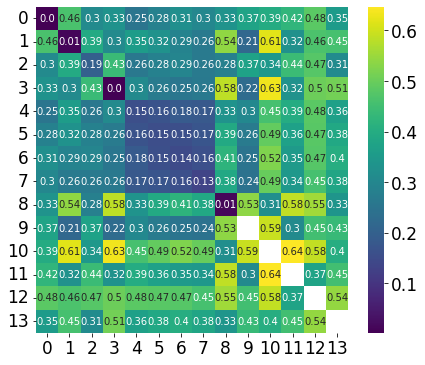

In [194]:
fig = plt.figure(figsize=(7, 6))
plt.rc('font', **{'family': 'DejaVu Sans', 'weight': 'normal', 'size': 17})
n_networks = len(labels_once)
dist_ave = np.zeros((n_networks, n_networks))
for i in range(n_networks):
    for j in range(n_networks):
        temp = np.copy(dist[list(all_networks.values())[i]['ids'], :][:, list(all_networks.values())[j]['ids']])
        if i==j: 
            for k in range(len(temp)):
                temp[k, k] = None # remove diagonal elemenrs
        #print(i, j, temp)
        #print(list(networks.values())[i]['ids'], list(networks.values())[j]['ids'])
        dist_ave[i, j] = np.nanmean(temp)
ax = sns.heatmap(dist_ave, cmap="viridis", annot=((dist_ave*100).astype(int)/100).astype(str), annot_kws={'fontsize': 10}, fmt='s')
ax.set_xticklabels(ax.get_xticklabels(), rotation=0)
ax.set_yticklabels(ax.get_yticklabels(), rotation=0)
#plt.xticks(np.linspace(0.5, len(labels_once)-.5, len(labels_once)), labels_once, fontsize=10)
#plt.yticks(np.linspace(0.5, len(labels_once)-.5, len(labels_once)), labels_once, fontsize=10)
#plt.axis('off')
plt.savefig("distancematrix.pdf", bbox_inches = 'tight')